Advertising Sales Channel Prediction

Problem Statement:

Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

The below link provided is for downloading the dataset. 
Downlaod Files:

    https://github.com/dsrscientist/DSData/blob/master/Advertising.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [2]:
df=pd.read_csv('Advertising.csv')
df

,S.No.,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df=df.replace(' ',np.nan)
df.isnull().sum()

S.No.        0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

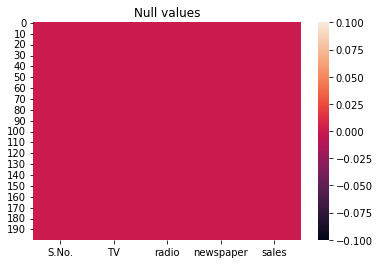

In [4]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S.No.      200 non-null    int64  
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

,S.No.,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
df.columns

Index(['S.No.', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [8]:
df.dtypes

S.No.          int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

<AxesSubplot:>

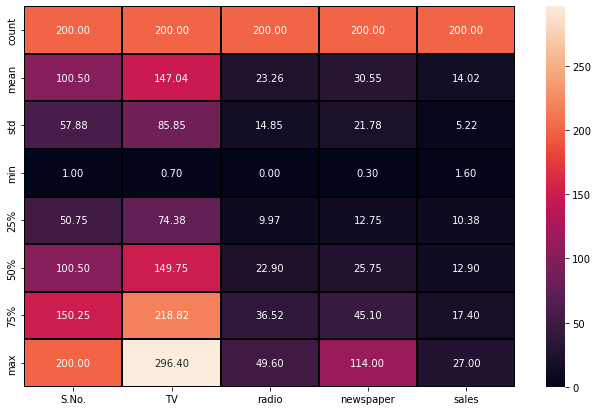

In [9]:
plt.figure(figsize=(11,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [10]:
df.corr()

,S.No.,TV,radio,newspaper,sales
S.No.,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


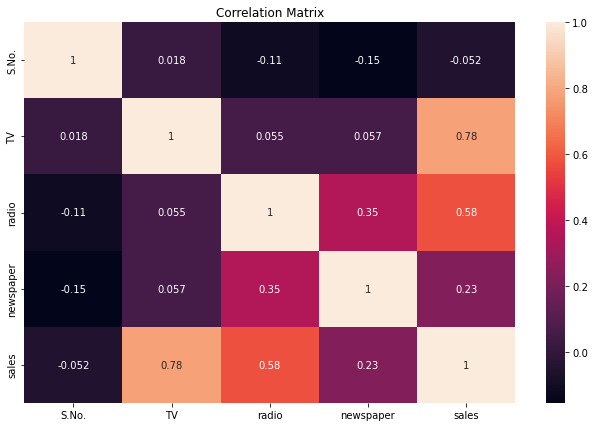

In [11]:
corr_mat=df.corr()
plt.figure(figsize=[11,7])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [12]:
df.corr()['sales'].sort_values()

S.No.       -0.051616
newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

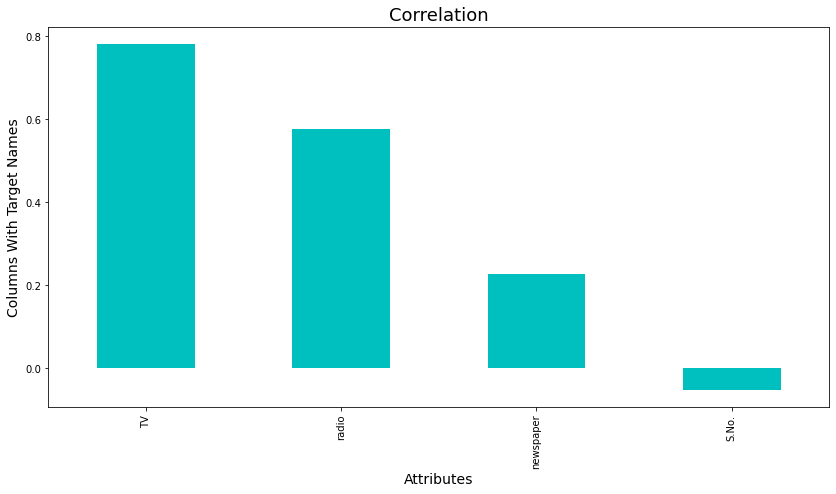

In [13]:
plt.figure(figsize=(14,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Attributes',fontsize=14)
plt.ylabel('Columns With Target Names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [14]:
df=df.drop(['S.No.'],axis=1)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


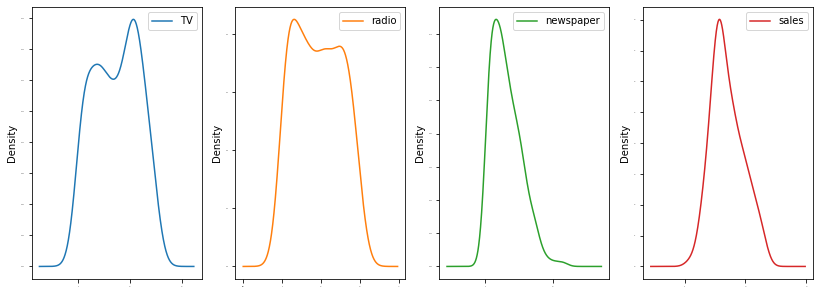

In [15]:
df.plot(kind='density',subplots=True,layout=(1,4),sharex=False,fontsize=1,figsize=(14,5))
plt.show()

# Outliers:

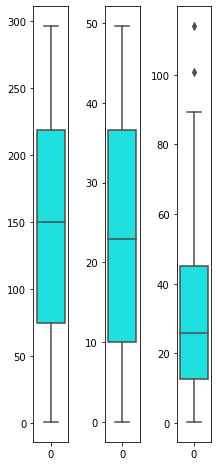

In [16]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)-1):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='cyan',orient='v')
    plt.tight_layout()

In [17]:
from scipy.stats import zscore
z=np.abs(zscore(df.iloc[:,:11]))
z.shape

(200, 4)

In [18]:
threshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [19]:
len(np.where(z>3)[0])

2

In [20]:
df_new=df[(z<3).all(axis=1)]

In [21]:
x=df_new.drop(['sales'],axis=1)
y=df_new['sales']

In [22]:
x.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
dtype: float64

In [23]:
from sklearn.preprocessing import power_transform

In [24]:
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [25]:
x.skew()

TV          -0.320682
radio       -0.236668
newspaper   -0.101288
dtype: float64

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
lr=LinearRegression()

maxAcc=0
maxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print('\n')
    acc=r2_score(target_test,pred_test)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc," on Random State: ",maxRS)

At random state 0,the training accuracy is:- 0.901291002097885
At random state 0,the testing accuracy is:- 0.9153223525494354


At random state 1,the training accuracy is:- 0.907560705387535
At random state 1,the testing accuracy is:- 0.8899875371730132


At random state 2,the training accuracy is:- 0.9145487608535885
At random state 2,the testing accuracy is:- 0.8690670885581866


At random state 3,the training accuracy is:- 0.9038683476410915
At random state 3,the testing accuracy is:- 0.9094654993350766


At random state 4,the training accuracy is:- 0.9080156627542778
At random state 4,the testing accuracy is:- 0.8805025579845184


At random state 5,the training accuracy is:- 0.9044410731238212
At random state 5,the testing accuracy is:- 0.8945026194148485


At random state 6,the training accuracy is:- 0.9071648377019736
At random state 6,the testing accuracy is:- 0.8921657380222969


At random state 7,the training accuracy is:- 0.9034105955818168
At random state 7,the testing accur

At random state 74,the training accuracy is:- 0.8889000730282358
At random state 74,the testing accuracy is:- 0.9274069162246448


At random state 75,the training accuracy is:- 0.9070384634175925
At random state 75,the testing accuracy is:- 0.8785527905964945


At random state 76,the training accuracy is:- 0.9105607876343562
At random state 76,the testing accuracy is:- 0.8755117807373418


At random state 77,the training accuracy is:- 0.9005925407589889
At random state 77,the testing accuracy is:- 0.9179516947889472


At random state 78,the training accuracy is:- 0.9145141190945101
At random state 78,the testing accuracy is:- 0.8456080844762168


At random state 79,the training accuracy is:- 0.9034230169686297
At random state 79,the testing accuracy is:- 0.9032665890079107


At random state 80,the training accuracy is:- 0.9024426012918224
At random state 80,the testing accuracy is:- 0.9135037189645718


At random state 81,the training accuracy is:- 0.900827456789431
At random state 81,

In [27]:
lr.fit(features_train,target_train)
pred_test=lr.predict(features_test)
print('Accuracy',r2_score(target_test,pred_test)*100)

Accuracy 93.12602169950901


In [28]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

maxAcc=0
maxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    dt.fit(features_train,target_train)
    pred_train=dt.predict(features_train)
    pred_test=dt.predict(features_test)
    acc=r2_score(target_test,pred_test)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",round(maxAcc*100,2),"% on Random State: ",maxRS)

Best accuracy:  98.06 % on Random State:  38


In [29]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

maxAcc=0
maxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    rf.fit(features_train,target_train)
    pred_train=rf.predict(features_train)
    pred_test=rf.predict(features_test)
    acc=r2_score(target_test,pred_test)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",round(maxAcc*100,2),"% on Random State: ",maxRS)

Best accuracy:  98.88 % on Random State:  81


In [30]:
features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=81)

In [31]:
pred_test=rf.predict(features_test)
print('Accuracy',r2_score(target_test,pred_test)*100)

Accuracy 99.42431950969328


RandomForestRegressor has the highest accuracy.

# Cross Validation:

In [32]:
train_acc=r2_score(target_train,pred_train)
test_acc=r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At Cross fold {j} cv score:{cv_mean} Accuracy Training: {train_acc} Accuracy Testing:{test_acc}")
    print('\n')

At Cross fold 2 cv score:0.9713620380275862 Accuracy Training: -1.0816014711676618 Accuracy Testing:0.9942431950969327


At Cross fold 3 cv score:0.9752557857193178 Accuracy Training: -1.0816014711676618 Accuracy Testing:0.9942431950969327


At Cross fold 4 cv score:0.9766633011375334 Accuracy Training: -1.0816014711676618 Accuracy Testing:0.9942431950969327


At Cross fold 5 cv score:0.9770848632959556 Accuracy Training: -1.0816014711676618 Accuracy Testing:0.9942431950969327


At Cross fold 6 cv score:0.9771547646555782 Accuracy Training: -1.0816014711676618 Accuracy Testing:0.9942431950969327


At Cross fold 7 cv score:0.9777034489180808 Accuracy Training: -1.0816014711676618 Accuracy Testing:0.9942431950969327


At Cross fold 8 cv score:0.9783234121922829 Accuracy Training: -1.0816014711676618 Accuracy Testing:0.9942431950969327


At Cross fold 9 cv score:0.9784879426132377 Accuracy Training: -1.0816014711676618 Accuracy Testing:0.9942431950969327




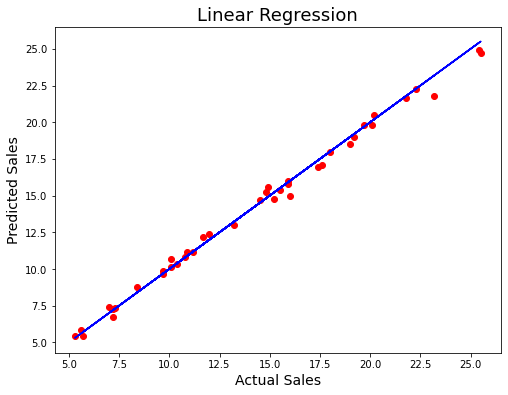

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [34]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],
            'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [37]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(features_train,target_train)
ls_score_training=ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
ls_score_training*100

89.99117845685076

In [38]:
pred_ls=ls.predict(features_test)
lss=r2_score(target_test,pred_ls)
print(round(lss*100,2),'%')

91.98 %


In [39]:
cv_score=cross_val_score(ls,x,y,cv=2)
cv_mean=cv_score.mean()
print(round(cv_mean*100,2),'%')

90.15 %


# Ensemble Technique

In [40]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [41]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print("R2 Score:",rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Validation Score:',rfc*100)

R2 Score: 98.81237272459798
Cross Validation Score: 97.71056010866914


# Saving Model

In [42]:
import joblib
joblib.dump(rf,'Advertising Sales Prediction.pkl')

['Advertising Sales Prediction.pkl']